In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.

In [6]:
df=pd.read_excel('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\11-Finance_and_Risk_analytics\\Week-2\\Project\\Company_Data2015.xlsx')

In [7]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [8]:
df.shape

(3586, 67)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [11]:
df.duplicated().sum()

0

Changing Field Name to New Filed Name as per data dictionary

In [12]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')

<ipython-input-12-106d134efc54>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')


In [13]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


Transform Target variable into 0 and 1
We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

In [14]:
df['default']=np.where((df['Networth_Next_Year']>0),0,1)

In [15]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


In [16]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

Checking the proportion of default

In [17]:
df.default.sum()/len(df.default)*100

10.819854991634132

Here we can see that 10.81 % of company fall under default category.

1.Dropping Co_Code and Co_Name as we do not need them for our analysis.
2. Dropping Networth Next Year as we have already created a dependent default variable where we have taken take value of 1 when net worth next year is negative & 0 when net worth next year is positive.

In [18]:
df.drop(['Co_Code','Co_Name','Networth_Next_Year'],axis=1,inplace=True)

In [19]:
df.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,...,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


In [20]:
df.shape

(3586, 65)

Dropping the dependent variable for further analysis

In [ ]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [34]:
df_X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


 Missing Value Treatment

In [ ]:
import matplotlib.pyplot as plt
def plot_nas(df_X: pd.DataFrame):
    if df_X.isnull().sum().sum() != 0:
        na_df = (df_X.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df_X)

Replacing missing values with median

In [ ]:
for column in df_X.columns:
    if df_X[column].dtype != 'object':
        median = df_X[column].median()
        df_X[column] = df_X[column].fillna(median)

In [ ]:
df_X.isnull().sum().sum()

In [ ]:
import matplotlib.pyplot as plt
def plot_nas(df_X: pd.DataFrame):
    if df_X.isnull().sum().sum() != 0:
        na_df = (df_X.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df_X)

Outlier detection & Treatment

In [ ]:
col_names = list(df_X.columns)
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_X[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    plt.tight_layout()

plt.show()

In [ ]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

for i in df_X:
    LL,UL=remove_outlier(df_X[i])
    df_X[i]=np.where(df_X[i]>UL,UL,df_X[i])
    df_X[i]=np.where(df_X[i]<LL,LL,df_X[i])

In [ ]:
col_names = list(df_X.columns)
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_X[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    plt.tight_layout()

plt.show()

In [ ]:
mask = np.triu(np.ones_like(df_X.corr()))
plt.figure(figsize=(30,30))
p=sns.heatmap(df_X.corr(),annot=True,cmap='coolwarm',square=True,mask=mask);

Dark red boxes have the highest correlation followed by light blue and dark blue. 

Univariate Analysis

In [35]:
for cols in df_X.columns:
    if df_X[cols].nunique()==1:
        print('Column name is '+cols+' and its unique value count is : '+ str(df_X[cols].nunique()))

We cannot use columns with only one unique value and hence we need to drop it.

In [36]:
df_X.drop('Capital_expenses_in_forex',axis=1, inplace=True)
df_X.drop('ROG_Revenue_earnings_in_forex_perc',axis=1, inplace=True)
df_X.drop('ROG_Revenue_expenses_in_forex_perc',axis=1, inplace=True)

KeyError: "['Capital_expenses_in_forex'] not found in axis"

In [37]:
df_X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [38]:
df_X.shape

(3586, 61)

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_pe

KeyboardInterrupt: 

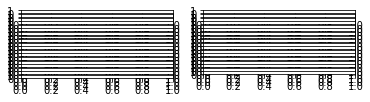

In [39]:
col_list=df_X.columns
print(col_list)

fig, axes = plt.subplots(nrows=len(col_list),ncols=2)
fig.set_size_inches(12,100)
x=0
y=0
for i in df_X.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df_X[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df_X[i], data=df_X, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

In [ ]:
Concating df_X and df_Y to build model.

In [40]:
df=pd.concat([df_X,df_Y],axis=1)

In [41]:
df.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,...,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


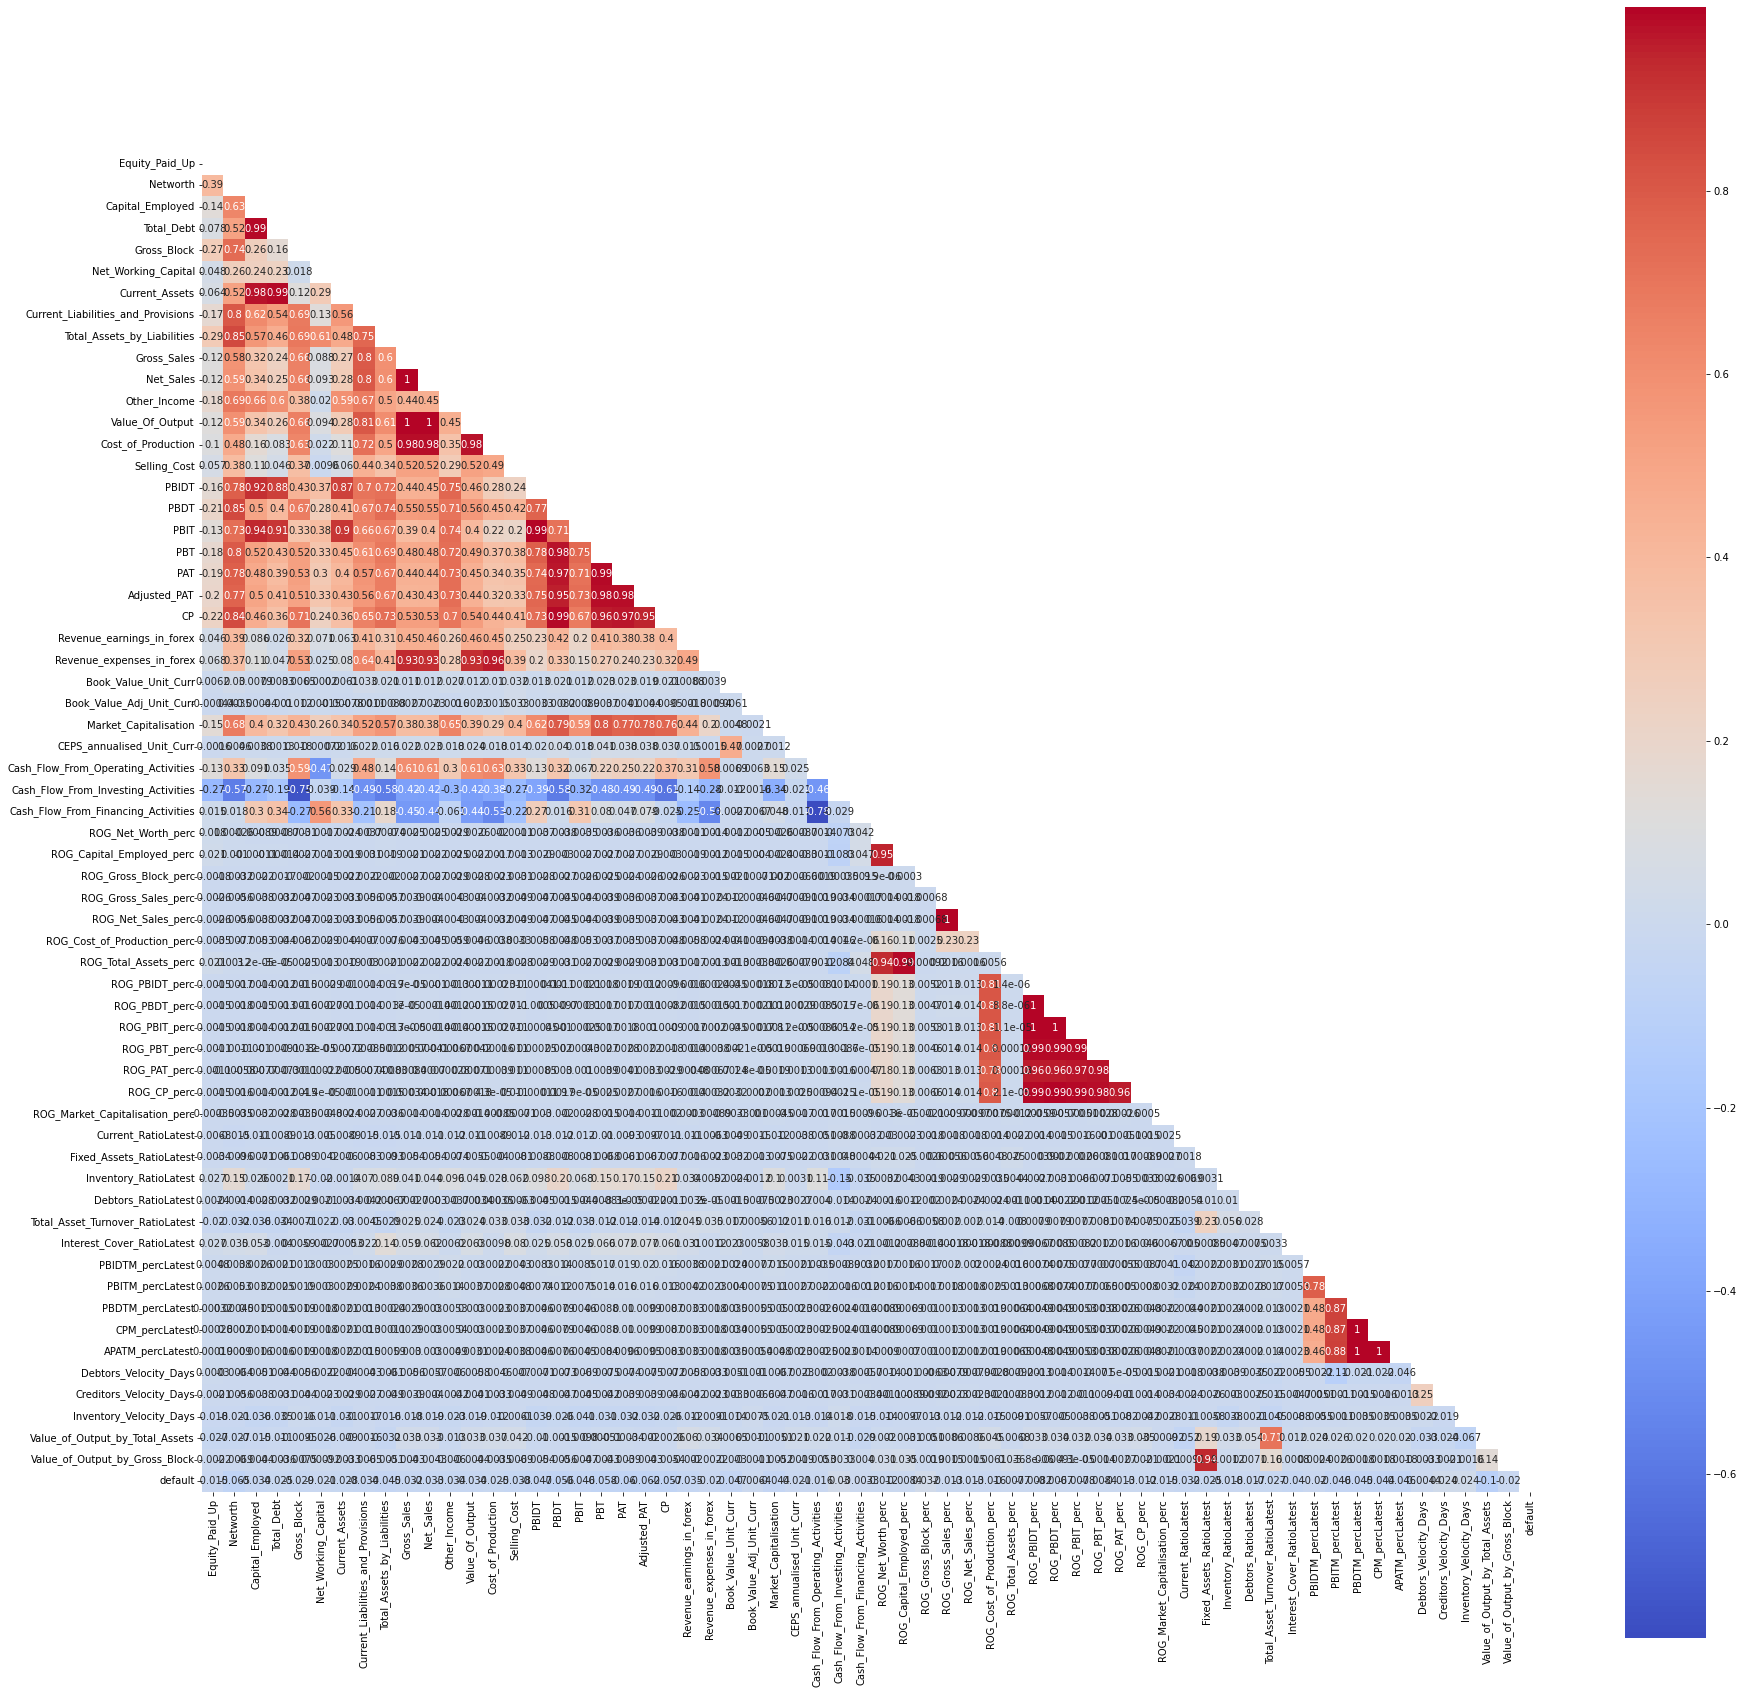

In [32]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(30,30))
p=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',square=True,mask=mask);

Method 1-Logistic Regression

Model 1

In [49]:
df.columns
import statsmodels.formula.api as SM

In [50]:
f_1 = 'default~Equity_Paid_Up+Networth+Capital_Employed+Total_Debt+Gross_Block+Net_Working_Capital+Current_Assets+Current_Liabilities_and_Provisions+Total_Assets_by_Liabilities+Gross_Sales+Net_Sales+Other_Income+Value_Of_Output+Cost_of_Production+Selling_Cost+PBIDT+PBDT+PBIT+PBT+PAT+Adjusted_PAT+CP+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_PBDT_perc+ROG_PBIT_perc+ROG_PBT_perc+ROG_PAT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Fixed_Assets_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBIDTM_percLatest+PBITM_percLatest+PBDTM_percLatest+CPM_percLatest+APATM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Total_Assets+Value_of_Output_by_Gross_Block'

In [52]:
## Fitting the logistic regression model on df dataset..

model_1=SM.logit(formula=f_1,data=df).fit()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
model_1.summary()

As lot of Fields have P value as more than 0.05 we need to iliminate them.
checking VIF values and the eliminarting the hightest and see the results and find the best features according to VIF.
For this testing we will keep VIF thresold value as 5.

In [46]:
# Checking the variance inflation factor..

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return(vif)

In [ ]:
X=df.drop('default',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Net_Sales',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

By dropping Net_Sales VIF reduced from 1696 to 526. Let's continue to eliminate parameters till we get below 5.

In [ ]:
X=X.drop('ROG_Gross_Sales_perc',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Gross_Sales',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('PBDT',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Total_Assets_by_Liabilities',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('PAT',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Value_Of_Output',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('CPM_percLatest',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Current_Assets',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('PBIDT',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('PBIDTM_percLatest',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('ROG_PBDT_perc',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Capital_Employed',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('PBT',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Book_Value_Unit_Curr',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('CP',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Value_of_Output_by_Total_Assets',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('ROG_PBIDT_perc',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Cost_of_Production',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('PBDTM_percLatest',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('ROG_PBT_perc',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Gross_Block',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Current_Liabilities_and_Provisions',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Fixed_Assets_RatioLatest',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('PBIT',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('Networth',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('APATM_percLatest',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

In [ ]:
X=X.drop('ROG_PAT_perc',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

We followed a traditional method of dropping one variable at a time to ensure we can see the impact of each and every variable and not simply removing all the variables having VIF > 5.

In [ ]:
X.shape

We can see that we have eliminated varibales to 33 from total 62 features of the data set.

In [ ]:
print((df['default'].value_counts(normalize=True).round(4))*100)

The data is highly imbalanced with 89.18% non default and 10.82% as defaulters. We need to balance the data while doing the split.

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('default', axis = 1)
y = df['default']

Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

Post stratifying we can see that the proportion of data is balanced between test and train.

In [ ]:
print((y_train.value_counts(normalize=True).round(4))*100)
print(' ')
print((y_test.value_counts(normalize=True).round(4))*100)

In [ ]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)

Model 2

In [ ]:
X.columns

In [ ]:
f_2='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Other_Income+Selling_Cost+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [ ]:
model_2=SM.logit(formula=f_2,data=df_train).fit()

In [ ]:
model_2.summary()

Model 3

Cash_Flow_From_Financing_Activities has the highest P value so we will run our model by dropping it in our next model.

In [ ]:
f_3='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Other_Income+Selling_Cost+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [28]:
model_3=SM.logit(formula=f_3,data=df_train).fit()
model_3.summary()

NameError: name 'SM' is not defined

Cash_Flow_From_Operating_Activities has the highest P value so we will run our model by dropping it in our next model.

Model 4

In [ ]:
f_4='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Other_Income+Selling_Cost+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [ ]:
model_4=SM.logit(formula=f_4,data=df_train).fit()
model_4.summary()

ROG_Market_Capitalisation_perc has the highest P value so we will run our model by dropping it in our next model.

Model 5

In [ ]:
f_5='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Other_Income+Selling_Cost+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [ ]:
model_5=SM.logit(formula=f_5,data=df_train).fit()
model_5.summary()

Other_Income has the highest P value so we will run our model by dropping it in our next model.

Model 6

In [ ]:
f_6='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Selling_Cost+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [ ]:
model_6=SM.logit(formula=f_6,data=df_train).fit()
model_6.summary()

Adjusted_PAT has the highest P value so we will run our model by dropping it in our next model

Model 7

In [ ]:
f_7='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Selling_Cost+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [ ]:
model_7=SM.logit(formula=f_7,data=df_train).fit()
model_7.summary()

ROG_Net_Sales_perc has the highest P value so we will run our model by dropping it in our next model

Model 8

In [ ]:
f_8='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Selling_Cost+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

model_8=SM.logit(formula=f_8,data=df_train).fit()
model_8.summary()

Inventory_Velocity_Days has the highest P value so we will run our model by dropping it in our next model



Model 9

In [ ]:
f_9='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Selling_Cost+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Value_of_Output_by_Gross_Block'

model_9=SM.logit(formula=f_9,data=df_train).fit()
model_9.summary()

Cash_Flow_From_Investing_Activities has the highest P value so we will run our model by dropping it in our next model

Model 10

In [ ]:
f_10='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Selling_Cost+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Value_of_Output_by_Gross_Block'

model_10=SM.logit(formula=f_10,data=df_train).fit()
model_10.summary()

Selling_Cost has the highest P value so we will run our model by dropping it in our next model

Model 11

In [ ]:
f_11='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Value_of_Output_by_Gross_Block'

model_11=SM.logit(formula=f_11,data=df_train).fit()
model_11.summary()

ROG_CP_perc has the highest P value so we will run our model by dropping it in our next model

Model 12

In [ ]:
f_12='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Value_of_Output_by_Gross_Block'

model_12=SM.logit(formula=f_12,data=df_train).fit()
model_12.summary()

Creditors_Velocity_Days has the highest P value so we will run our model by dropping it in our next model

Model 13

In [ ]:
f_13='default~Equity_Paid_Up+Total_Debt+Net_Working_Capital+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Value_of_Output_by_Gross_Block'

model_13=SM.logit(formula=f_13,data=df_train).fit()
model_13.summary()

Equity_Paid_Up has the highest P value so we will run our model by dropping it in our next model

Model 14

In [ ]:
f_14='default~Total_Debt+Net_Working_Capital+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days+Value_of_Output_by_Gross_Block'

model_14=SM.logit(formula=f_14,data=df_train).fit()
model_14.summary()

Value_of_Output_by_Gross_Block has the highest P value so we will run our model by dropping it in our next model

Model 15

In [ ]:
f_15='default~Total_Debt+Net_Working_Capital+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days'

model_15=SM.logit(formula=f_15,data=df_train).fit()
model_15.summary()

As we can see now all our P values are less than 1 and we can now test our model on test data. We can continue to build models till our P values are almost 0. we will use model_15 for our analysis.

Model Prediction

Model prediction on train set

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,accuracy_score,roc_auc_score,roc_curve
from sklearn import metrics

In [ ]:
y_prob_pred_train=model_15.predict(df_train)

In [ ]:
y_class_pred=[]

for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)  

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='0.5g',cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Actual',rotation=0);

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

As we can see the model_15 recall is fairly good with 72.7% and has accuracy of 95.9%. the model is overfitting.

In [ ]:
y_prob_pred_15=model_15.predict()

In [ ]:
sns.boxplot(x=df_train['default'],y=y_prob_pred_15);
plt.xlabel('Default')

From the box plot we can see that median for default is high.

Choosing the optimal threshold to ensure that our cutoff is optimal.

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr,tpr,thresholds=roc_curve(df_train['default'],y_prob_pred_train)

In [ ]:
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_idx]
optimal_threshold

In [ ]:
y_class_pred=[]

for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.14:
        a=1
    else:
        a=0
    y_class_pred.append(a)  

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='0.5g',cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Actual',rotation=0);

In [ ]:
print(metrics.classification_report(df_train['default'],y_class_pred,digits=3))

Here the recall value is 93.1% and accuracy has gone down to 92.6 but still can be considered a good model.

Model prediction on test set using optimal value.

In [ ]:
y_prob_pred_test=model_15.predict(df_test)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.14:
        a=1
    else:
        a=0
        
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_test['default'],y_class_pred)),annot=True,fmt='0.5g',cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Actual',rotation=0);

In [ ]:
print(metrics.classification_report(df_test['default'],y_class_pred,digits=3))

On the test model the recall is  90.6% and accuracy is 90.9%.

Our analysis concludes that for Logistics Regression model our recall is 90.6% and accuracy is 90.9% on the test data.

Method 2-Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [ ]:
LDA=LinearDiscriminantAnalysis()

In [ ]:
lda_model=LDA.fit(X_train,y_train)

Prediction on trin and test data

In [ ]:
pred_train_lda=lda_model.predict(X_train)
pred_test_lda=lda_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train,pred_train_lda))

In [ ]:
print(metrics.classification_report(y_test,pred_test_lda))

In [ ]:
pred_train_lda_prob=lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob=lda_model.predict_proba(X_test)[:,1]

In [ ]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_lda_prob)

In [ ]:
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_idx]
optimal_threshold

In [ ]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.12:
        a=1
    else:
        a=0
        
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='0.5g',cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Actual',rotation=0);

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

In [ ]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.12:
        a=1
    else:
        a=0
        
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='0.5g',cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Actual',rotation=0);

In [ ]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

For LDA the recall is 89.8% and accuracy is 88.1% so it is little below Linear Regression

Method 3-Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth':[3,5,7],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[15,30,45],
    'n_estimators':[25,10]
}

rfcl=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
pred_train_rf=best_grid.predict(X_train)
pred_test_rf=best_grid.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train,pred_train_rf,digits=3))

In [ ]:
print(metrics.classification_report(y_test,pred_test_rf,digits=3))

In [ ]:
print("For Logistics Regression model our recall is 90.6% and accuracy is 90.9% on the test data.")
print('For Random Forest Classifier model the recall is 82.0% and accuracy is 98.0.')
print('For LDA the recall is 89.8% and accuracy is 88.1% ')

Based on the above data it is good to go for Logistics Regression model.

Model-4 SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# Treating target imbalance using SMOTE..Synthetic minority oversampling technique..

In [ ]:
sm=SMOTE(random_state=33,sampling_strategy=0.75)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [ ]:
default_smote=pd.concat([X_res,y_res],axis=1)

In [ ]:
df.groupby('default').mean()

In [ ]:
default_smote.groupby('default').mean()

Model Building using Logistic regression for probability at default

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
train_smote=pd.concat([X_res,y_res],axis=1)
test=pd.concat([X_test,y_test],axis=1)

In [ ]:
train.columns

In [ ]:
len(train.columns)

In [ ]:
train_smote.columns

In [ ]:
len(train_smote.columns)

In [ ]:
f_16='default~Total_Debt+Net_Working_Capital+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+Debtors_Velocity_Days'

In [ ]:
model_16=SM.logit(formula=f_16,data=train_smote).fit()

In [ ]:
model_16.summary()

Validating the model on train set

In [ ]:
y_pred_train_smote=np.where(model_16.predict(train_smote)>0.5,1,0)

In [ ]:
y_class_pred_smote=[]

for i in range(0,len(y_pred_train_smote)):
    if np.array(y_pred_train_smote)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_res,y_pred_train_smote)),annot=True,fmt='0.5g',cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Actual',rotation=0);

In [ ]:
print(classification_report(y_res, y_pred_train_smote))

In [ ]:
y_pred_test_smote = np.where(model_16.predict(test) > 0.5, 1, 0)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred_test_smote)),annot=True,fmt='0.5g',cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Actual',rotation=0);

In [ ]:
print(classification_report(y_test, y_pred_test_smote))

END...

In [ ]:
|